In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install wordcloud-fa
!pip install gensim

     |████████████████████████████████| 81kB 2.8MB/s 
     |████████████████████████████████| 368kB 14.2MB/s 
     |████████████████████████████████| 317kB 37.3MB/s 
     |████████████████████████████████| 1.4MB 35.6MB/s 
     |████████████████████████████████| 235kB 36.7MB/s 
  Created wheel for wordcloud-fa: filename=wordcloud_fa-0.1.8-cp37-none-any.whl size=71015 sha256=6a52d8538923382b69b20372d2c9b780d60bff193789a8ad97eeaface7e23185
  Stored in directory: /root/.cache/pip/wheels/37/dd/e9/d6d14e3faa089ffa1bc80ae6f713ca91d2ffd0bb786edcdef5
  Created wheel for nltk: filename=nltk-3.3-cp37-none-any.whl size=1394487 sha256=4d923dd6d5350662e7c2ac350cb74c07a9799f4e347c91fe9b20d53ff1545e63
  Stored in directory: /root/.cache/pip/wheels/d1/ab/40/3bceea46922767e42986aef7606a600538ca80de6062dc266c
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp37-cp37m-linux_x86_64.whl size=154700 sha256=10a357f7b2a8ffc4240d5faef9df220908ce7d92a296914445b8f3c4f47fa967
  Stored in directory: /root/.

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import nltk 
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# from nltk.stem import SnowballStemmer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import plot_confusion_matrix


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.layers import Dropout,Embedding,GlobalMaxPooling1D, MaxPooling1D, Add, Flatten

import re
print("Tensorflow Version",tf.__version__)

Tensorflow Version 2.5.0


In [4]:
df = pd.read_excel('/content/drive/MyDrive/MasterThesis/DataSet-forUsing/7-offDSA2020-dev-train-test-10000.xlsx')
# df.head()
# df.describe

In [5]:
df.columns = ['tweets', 'off','hs','new_label']
# df.head()

In [6]:
df = df.drop(['hs','new_label'], axis=1)

Text(0.5, 1.0, 'Hate speech Data Distribution')

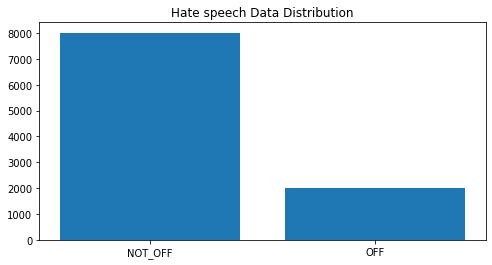

In [7]:
val_count = df.off.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Hate speech Data Distribution")

In [8]:
import random
random_idx_list = [random.randint(1,len(df.tweets)) for i in range(10)] # creates random indexes to choose from dataframe
df.loc[random_idx_list,:].head(10) # Returns the rows with the index and display it

,tweets,off
7155,يا عذاب يا جرح الهجر بين صحرا و مطر<LF>يا عذاب...,NOT_OFF
1749,@USER يا صباح الحب و صباح النجاح و صباح التالق...,NOT_OFF
918,@USER يا لطيف يا لطيف يا لطيف يا لطيف,NOT_OFF
5059,@USER هههههههههههههههه يا خره يا عيال الخره ال...,OFF
5608,بكُل قطِرة مطر أمنَية يا الله،حققّها لي بلُطفك...,NOT_OFF
5246,RT @USER: من ساعه ما دخلت علووم يا مستنى امتحا...,NOT_OFF
1991,RT @USER: بسم ﷲ الرّحمن ‌الرّحيم<LF>يا مقلّب ا...,NOT_OFF
2586,@USER يا تميم المجد يا عالي المقام<LF>#تميم_المجد,NOT_OFF
3485,@USER يا ابو سكسوكة صفراء ... صواب القمل ماليه...,OFF
5524,@USER يا سلومة يا جاهل هذه فيديوات ينزلوا فيهم...,OFF


#Text Preprocessing¶


In [9]:
import gensim

In [10]:
# load the model
model = gensim.models.Word2Vec.load('/content/drive/MyDrive/MasterThesis/Code/Offensive2020-SharedTask-Dataset/WE/Twt-CBOW/Twt-CBOW')

In [11]:
text_cleaning_re = "[a-zA-Z]|\d+|[٠١٢٣٤٥٦٧٨٩]|[.#،<>@,\\-_”“٪ًَ]"
def preprocess(text):
  
  #remove tashkeel
  p_tashkeel = re.compile(r'[\u0617-\u061A\u064B-\u0652]')
  text = re.sub(p_tashkeel,"", str(text))
  # text = text.replace('وو', 'و')
  # text = text.replace('يي', 'ي')
  # text = text.replace('اا', 'ا')
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  #remove longation
  text = re.sub(r'(.)\1+', r'\1\1', str(text)) 
  text = re.sub("[إأآا]", "ا", str(text))
  text = re.sub("ى", "ي", str(text))
  # text = re.sub("ؤ", "ء", text)
  # text = re.sub("ئ", "ء", text)
  text = re.sub("ة", "ه", str(text))
  # for i in range(0, len(search)):
  #       text = text.replace(search[i], replace[i])
  
   #trim    
  # text = text.strip()

  tokens = []
  for token in text.split():
    # if token not in stop_words:
      tokens.append(token)
  return " ".join(tokens)

In [12]:
word = preprocess(u'حقير')

# find and print the most similar terms to a word
most_similar = model.wv.most_similar( word )
for term, score in most_similar:
	print(term, score)

سافل 0.6879982352256775
خسيس 0.6644033193588257
قذر 0.6214959621429443
منحط 0.6129060983657837
وقح 0.6018147468566895
غبي 0.5982157588005066
وحقير 0.5942843556404114
وسافل 0.5851724743843079
ومنحط 0.5787683725357056
جبان 0.5700664520263672


In [13]:
word_vector = model.wv[ word ]
# word_vector

In [14]:
df.tweets = df.tweets.apply(lambda x: preprocess(x))
df.tweets[:10]

0    في حاجات مينفعش نلفت نظركوا ليها زي الاصول كده...
1    : وعيون تنادينا تحايل فينا و نقول يا عيونه يا ...
2    يا بلادي يا ام البلاد يا بلادي بحبك يا مصر بحب...
3    : يا رب يا قوي يا معين مدني بالقوه و العون و ا...
4                    : رحمك الله يا صدام يا بطل ومقدام
5    يا جابر يا بنجرجي يا مرتزق يا حثاله الحمدين يا...
6    : يا انـت يا بعضــي وكلــي وذاتــي يا لـون الف...
7                    كحل عينك يا منحط يا وضيع يا متخلف
8    لعنه الله عليك يا النذل يا الواطي ولعنه الله ع...
9    يا قلب يا احد الاصغرين كيف اتسعت لهذا الوجود ؟...
Name: tweets, dtype: object

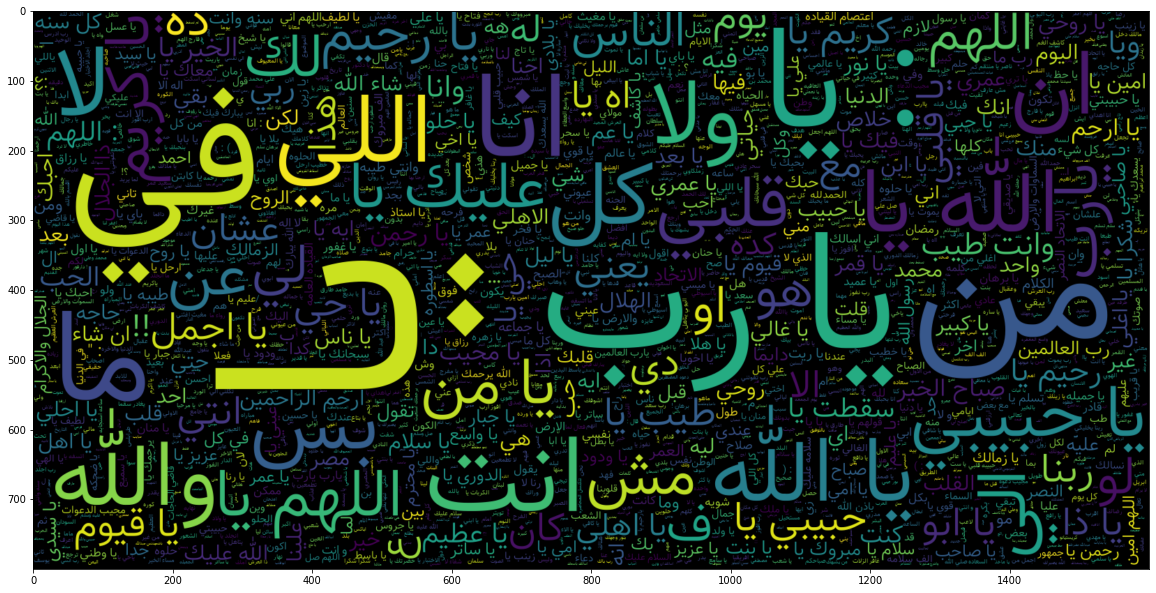

In [15]:
#Not Offensive Words
from wordcloud_fa import WordCloudFa


plt.figure(figsize = (20,20)) 
wc=WordCloudFa(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.off == 'NOT_OFF'].tweets))
# wc = WordCloud(font_path='/content/drive/MyDrive/MasterThesis/NotoNaskhArabic-Regular.ttf',max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.off == 'NOT_OFF'].tweets))

image = wc.to_image()
image.save('wordcloud.png')
plt.imshow(wc , interpolation = 'bilinear')

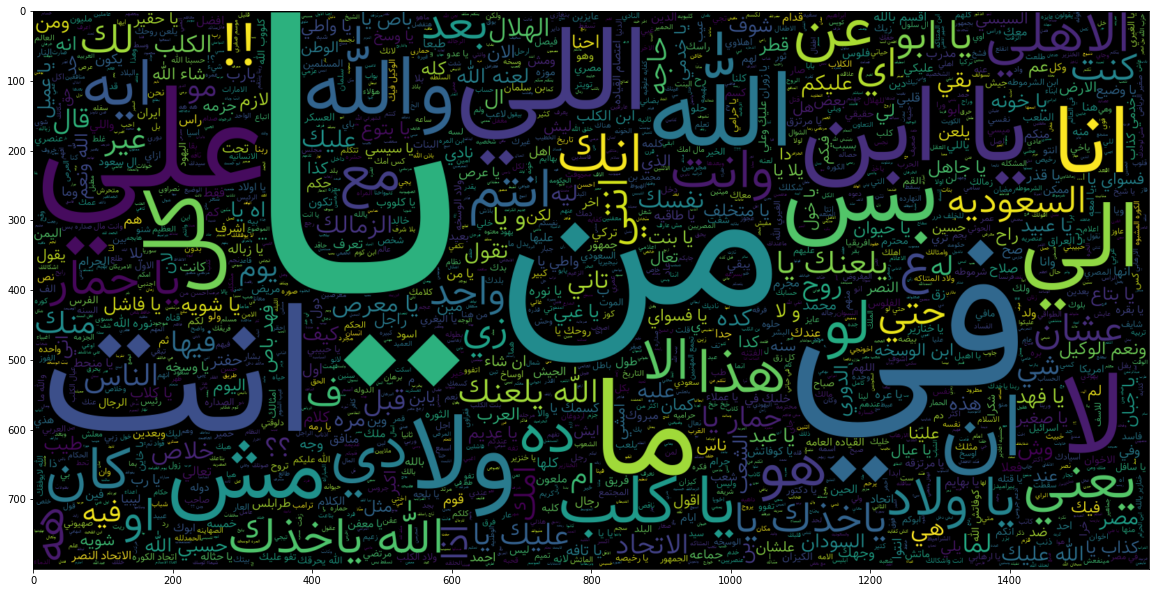

In [16]:
plt.figure(figsize = (20,20)) 
wc=WordCloudFa(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.off == 'OFF'].tweets))
image = wc.to_image()
image.save('wordcloudoff.png')
plt.imshow(wc , interpolation = 'bilinear')

# Train and Test Split

In [17]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 10000
MAX_SEQUENCE_LENGTH = 30


In [18]:
# train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE,
#                                          random_state=7) # Splits Dataset into Training and Testing set
# print("Train Data size:", len(train_data))
# print("Test Data size", len(test_data))
X_train, X_test, y_train, y_test = train_test_split(df.tweets,df.off, test_size = 0.2, random_state = 42, stratify=df.off)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.125, random_state = 42, stratify=y_train)

print("Train Data size:", len(X_train))
print("Test Data size", len(X_test))
print("Val Data size", len(X_val))

Train Data size: 7000
Test Data size 2000
Val Data size 1000


In [19]:
# train_data.head(10)


In [20]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
# tokenizer.fit_on_texts(X_test)

tokenizer.fit_on_texts(X_val)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)


Vocabulary Size : 35380


In [21]:
from keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(tokenizer.texts_to_sequences(X_train),
                        maxlen = MAX_SEQUENCE_LENGTH)
X_val = pad_sequences(tokenizer.texts_to_sequences(X_val),
                       maxlen = MAX_SEQUENCE_LENGTH)

X_test=pad_sequences(tokenizer.texts_to_sequences(X_test),maxlen=MAX_SEQUENCE_LENGTH)
print("Training X Shape:",X_train.shape)
print("Validation X Shape:",X_val.shape)
print("Testing X Shape:",X_test.shape)


Training X Shape: (7000, 30)
Validation X Shape: (1000, 30)
Testing X Shape: (2000, 30)


In [22]:
# labels = train_data.off.unique().tolist()
# labels

In [23]:
encoder = LabelEncoder()
encoder.fit(y_train.to_list())
# encoder.fit(y_val.to_list())
# encoder.fit(y_test.to_list())

y_train = encoder.transform(y_train.to_list())
y_val = encoder.transform(y_val.to_list())
Y_test = encoder.transform(y_test.to_list())

y_train = y_train.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)
y_val = y_val.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", Y_test.shape)
print("y_val shape:", y_val.shape)


y_train shape: (7000, 1)
y_test shape: (2000, 1)
y_val shape: (1000, 1)


In [24]:
# Y_test

# Word embedding

In [25]:
# !wget http://mazajak.inf.ed.ac.uk:8000/get_sg_250
# !wget https://www.dropbox.com/s/ce9phmmawoe1ure/Twt-CBOW.zip

In [26]:
# !unzip Twt-CBOW.zip
# !gunzip -k cc.ar.300.vec.gz

In [27]:
# !ls

In [28]:
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 30


In [29]:
# load the model
modelwv = gensim.models.Word2Vec.load('/content/drive/MyDrive/MasterThesis/Code/Offensive2020-SharedTask-Dataset/WE/Twt-CBOW/Twt-CBOW')

In [30]:
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    if word in modelwv.wv.vocab:
      embedding_vector = modelwv[word]
    else:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [31]:
print(embedding_matrix.shape)
# EMBEDDING_DIM=300


(35380, 300)


In [32]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

#Model Training - LSTM


In [33]:
!pip install --upgrade keras


Requirement already up-to-date: keras in /usr/local/lib/python3.7/dist-packages (2.4.3)


In [34]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout,GRU
from tensorflow.keras.layers import SpatialDropout1D
from keras.layers import Dropout,Embedding,GlobalMaxPool1D, MaxPooling1D, Add, Flatten,GlobalAveragePooling1D
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.models import Model
from keras.layers.merge import concatenate, add
from keras import regularizers
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Conv1D, GRU, BatchNormalization


In [36]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x=Conv1D(filters=300, kernel_size=3, padding='same', activation='relu')(x)
x=MaxPooling1D(pool_size=2)(x)
x=Conv1D(filters=300, kernel_size=3, padding='same', activation='relu')(x)
x=MaxPooling1D(pool_size=2)   (x)
# x=Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2))(x)



outputs = Dense(1, activation="sigmoid")(x)
model = Model(sequence_input, outputs)
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# history=model.fit(x_train, y_train,validation_data=(x_test, y_test), batch_size=50, epochs=50,verbose=1,callbacks=[EarlyStopping(monitor='val_loss',patience=5)]) # validation_split=0.1);

The following Variables were used a Lambda layer's call (tf.compat.v1.nn.embedding_lookup_1), but
are not present in its tracked objects:
  <tf.Variable 'embedding/embeddings:0' shape=(35380, 300) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.


In [37]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
# Adam(learning_rate=LR)
model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])


my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)
]

In [38]:
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(X_val, y_val), callbacks=my_callbacks)

Epoch 1/30
7/7 [==============================] - 45s 205ms/step - loss: 0.6842 - accuracy: 0.7773 - val_loss: 0.6283 - val_accuracy: 0.8009
Epoch 2/30
7/7 [==============================] - 0s 44ms/step - loss: 0.6172 - accuracy: 0.8021 - val_loss: 0.5937 - val_accuracy: 0.8009
Epoch 3/30
7/7 [==============================] - 0s 45ms/step - loss: 0.5717 - accuracy: 0.8026 - val_loss: 0.5433 - val_accuracy: 0.8011
Epoch 4/30
7/7 [==============================] - 0s 45ms/step - loss: 0.5039 - accuracy: 0.8121 - val_loss: 0.5031 - val_accuracy: 0.7964
Epoch 5/30
7/7 [==============================] - 0s 44ms/step - loss: 0.4565 - accuracy: 0.8189 - val_loss: 0.4986 - val_accuracy: 0.7986
Epoch 6/30
7/7 [==============================] - 0s 45ms/step - loss: 0.4422 - accuracy: 0.8244 - val_loss: 0.4995 - val_accuracy: 0.8003
Epoch 7/30
7/7 [==============================] - 0s 44ms/step - loss: 0.4329 - accuracy: 0.8301 - val_loss: 0.4934 - val_accuracy: 0.8020
Epoch 8/30
7/7 [=========

In [39]:
scores = model.evaluate(X_train,y_train, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# print(y_train)

accuracy: 85.58%


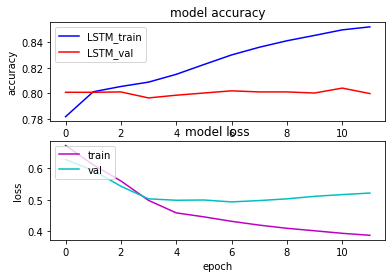

In [40]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [41]:
# evaluate the model
scorestest = model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scorestest[1]*100))

accuracy: 79.91%


In [42]:
model.evaluate(X_test, Y_test)

63/63 [==============================] - 0s 4ms/step - loss: 0.5053 - accuracy: 0.7991


[0.5052992105484009, 0.7991429567337036]

# Val Evaluation

In [44]:
# # make probability predictions with the model
# predictionsVal = model.predict(X_val)
# # round predictions 
# roundedVal = [round(x[0]) for x in predictionsVal]
# roundedVal[10:20]

# cm=confusion_matrix(y_val,roundedVal)
# print('confusion_matrix \n ',cm)

# print(classification_report(list(y_val), roundedVal))


In [ ]:
# from sklearn import metrics

# thresholds = []
# for thresh in np.arange(0.1, 0.501, 0.01):
#     thresh = np.round(thresh, 2)
#     res = metrics.f1_score(y_val, (predictionsVal > thresh).astype(int))
#     thresholds.append([thresh, res])
#     print("F1 score at threshold {0} is {1}".format(thresh, res))
    
# thresholds.sort(key=lambda x: x[1], reverse=True)
# best_thresh_2 = thresholds[0][0]
# print("Best threshold: ", best_thresh_2)

#Confusion Matrix¶


In [49]:
def decode_sentiment(score):
    return 0 if (score>0.11).any() else 1

scores = model.predict(X_val, verbose=1, batch_size=100)

# scores.astype(np.float32)
# type(scores)
y_pred_1d = np.array([decode_sentiment(score) for score in scores])
print(y_pred_1d[:10])
print(y_val[:10].tolist())

10/10 [==============================] - 0s 4ms/step
[0 0 0 0 0 0 0 0 0 0]
[[0], [0], [0], [0], [0], [0], [0], [0], [0], [1]]


In [50]:
print(classification_report(list(y_val), list(y_pred_1d)))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       801
           1       0.00      0.00      0.00       199

    accuracy                           0.80      1000
   macro avg       0.40      0.50      0.44      1000
weighted avg       0.64      0.80      0.71      1000



In [ ]:
# from sklearn.metrics import precision_recall_curve
# from sklearn.metrics import f1_score
# from sklearn.metrics import auc
# from matplotlib import pyplot
# from sklearn.metrics import roc_curve
# from sklearn.metrics import roc_auc_score

# ns_probs = [0 for _ in range(len(Y_test))]
# # calculate roc curve
# fpr, tpr, thresholds = roc_curve(Y_test,ns_probs)

# ns_auc = roc_auc_score(Y_test,ns_probs)
# # lr_auc = roc_auc_score(testy, lr_probs)
# # summarize scores
# print('No Skill: ROC AUC=%.3f' % (ns_auc))
# print('Logistic: ROC AUC=%.3f' % (lr_auc))

# # predict probabilities
# # lr_probs = model.predict_proba(X_test)
# # keep probabilities for the positive outcome only
# lr_probs = scores[:, 0]
# lr_auc = roc_auc_score(Y_test, lr_probs)
# lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)

# pyplot.plot(fpr, tpr, linestyle='--', label='No Skill')
# pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# # axis labels
# pyplot.xlabel('False Positive Rate')
# pyplot.ylabel('True Positive Rate')
# # show the legend
# pyplot.legend()
# # show the plot
# pyplot.show()

In [ ]:
# y_pred_1d = np.array([decode_sentiment(score) for score in scores])
# print(y_pred_1d[:10])
# print(y_test[:10].to_list())

In [ ]:
# import itertools
# from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# def plot_confusion_matrix(cm, classes,
#                           title='Confusion matrix',
#                           cmap=plt.cm.Blues):
#     """
#     This function prints and plots the confusion matrix.
#     Normalization can be applied by setting `normalize=True`.
#     """

#     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title, fontsize=20)
#     plt.colorbar()
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, fontsize=13)
#     plt.yticks(tick_marks, classes, fontsize=13)

#     fmt = '.2f'
#     thresh = cm.max() / 2.
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, format(cm[i, j], fmt),
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")

#     plt.ylabel('True label', fontsize=17)
#     plt.xlabel('Predicted label', fontsize=17)


In [ ]:
# cnf_matrix = confusion_matrix(y_test.to_list(),y_pred_1d )
# plt.figure(figsize=(6,6))
# plot_confusion_matrix(cnf_matrix, classes=y_test.unique(), title="Confusion matrix")
# plt.show()